In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine



In [2]:
df = pd.read_csv('/content/kor_maf.csv.gz')

df.head()


,Locus,Allele,freq
0,rs13405034,T,0.0
1,rs176479,C,0.0
2,rs17330508,T,0.0
3,rs12116837,A,0.0
4,rs720235,A,0.0


In [3]:
df1= pd.read_csv('/content/est_maf.csv.gz')
df1.head()

,Locus,Allele,freq
0,rs13405034,T,0.020
1,rs176479,C,0.012
2,rs17330508,T,0.024
3,rs12116837,A,0.036
4,rs720235,A,0.027


In [4]:
df1.head()

,Locus,Allele,freq
0,rs13405034,T,0.020
1,rs176479,C,0.012
2,rs17330508,T,0.024
3,rs12116837,A,0.036
4,rs720235,A,0.027


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39108 entries, 0 to 39107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Locus   39108 non-null  object 
 1   Allele  39108 non-null  object 
 2   freq    39108 non-null  float64
dtypes: float64(1), object(2)
memory usage: 916.7+ KB


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39108 entries, 0 to 39107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Locus   39108 non-null  object 
 1   Allele  39108 non-null  object 
 2   freq    39108 non-null  float64
dtypes: float64(1), object(2)
memory usage: 916.7+ KB


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
le =  LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

In [8]:
le =  LabelEncoder()
for i in df1:
    if df1[i].dtype=='object':
        df1[i] = le.fit_transform(df1[i])
    else:
        continue

In [9]:
df.head()

,Locus,Allele,freq
0,7456,3,0.0
1,12038,1,0.0
2,11705,3,0.0
3,5219,0,0.0
4,30948,0,0.0


In [10]:
df1.head()

,Locus,Allele,freq
0,7456,3,0.020
1,12038,1,0.012
2,11705,3,0.024
3,5219,0,0.036
4,30948,0,0.027


In [11]:

 df_onehot=df    
 
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Nchs = SS.fit_transform(df_onehot)
from sklearn.decomposition import PCA    


Text(0.5, 1.0, 'Explained variance')

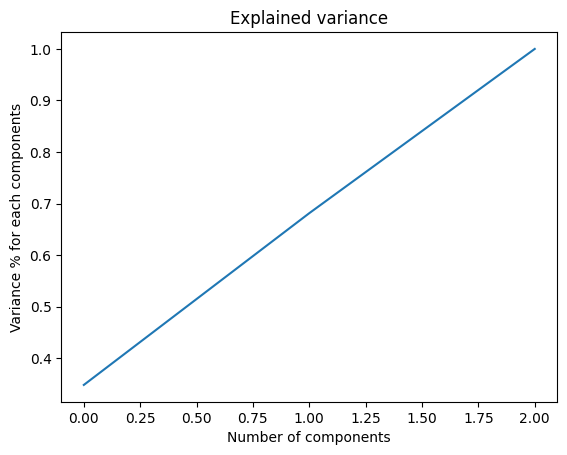

In [13]:

     

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Nchs = SS.fit_transform(Nchs)
     

pca1=PCA().fit(Nchs)
import numpy as np
plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')

In [14]:
pca=PCA(n_components=.125)
pca.fit(Nchs)
x_pca=pca.transform(Nchs)

In [15]:
df.head()

,Locus,Allele,freq
0,7456,3,0.0
1,12038,1,0.0
2,11705,3,0.0
3,5219,0,0.0
4,30948,0,0.0


In [16]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

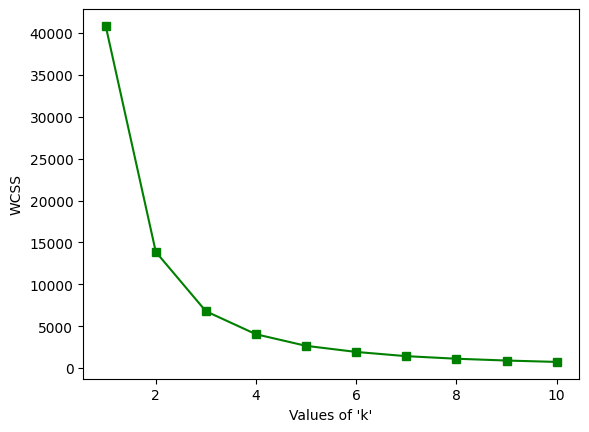

In [17]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state=1234).fit(Nchs)
y_cluster = model.predict(Nchs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
centers=pca.transform(model.cluster_centers_)

centers


array([[-0.10683612,  0.89734392],
       [ 0.10598718, -0.89021344]])

In [20]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(Nchs),columns=['PCA1','PCA2'])


reduced_X.head()


,PCA1,PCA2
0,-1.555692,-1.496139
1,-1.470323,0.260698
2,-1.290889,-1.473179
3,-1.995385,1.089889
4,-0.391923,1.228917


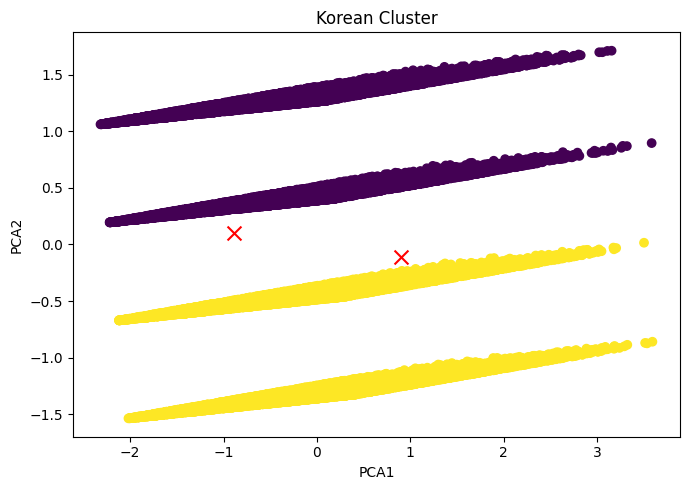

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=model.labels_)
plt.scatter(centers[:,-1],centers[:,0],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Korean Cluster')
plt.tight_layout()

In [25]:
df_onehot1=df1   

In [27]:
SS = StandardScaler()
Nchs1 = SS.fit_transform(df_onehot1)
from sklearn.decomposition import PCA  

Text(0.5, 1.0, 'Explained variance')

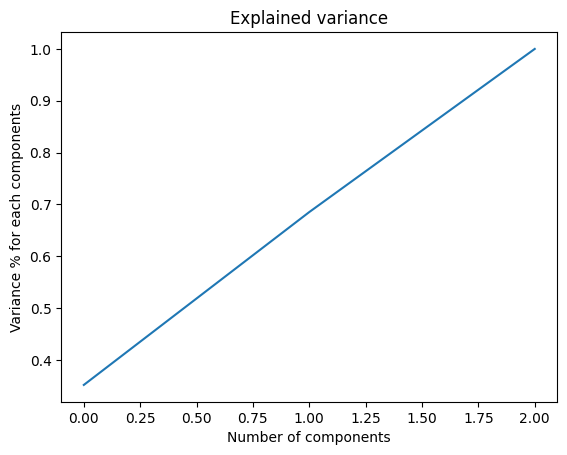

In [33]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Nchs1 = SS.fit_transform(Nchs1)
     

pca1=PCA().fit(Nchs1)
import numpy as np
plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')

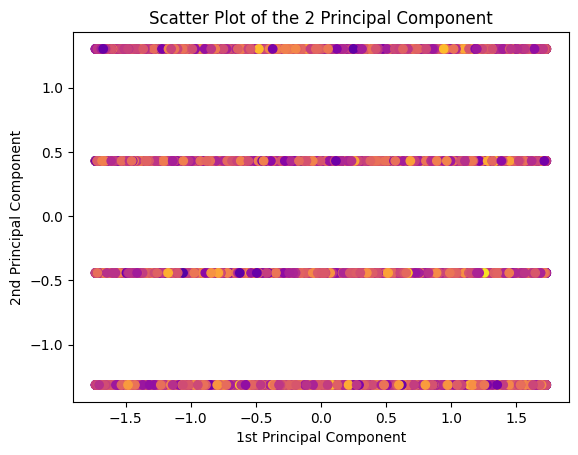

In [34]:
plt.scatter(Nchs1[:,0], Nchs1[:,1], c = df1['freq'], cmap = 'plasma')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 2 Principal Component')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

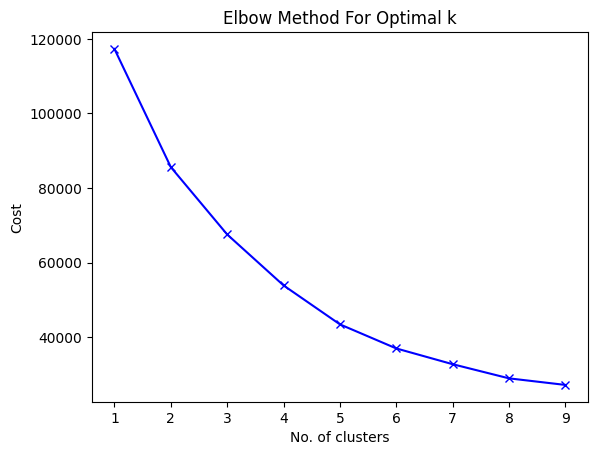

In [31]:
estonian = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(Nchs1)
 estonian.append(kmeans.inertia_)
plt.plot(K, estonian, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
model2 = KMeans(n_clusters = 2, random_state=1234).fit(Nchs1)
y_cluster2 = model2.predict(Nchs1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
centers1=pca1.transform(model2.cluster_centers_)

centers1

array([[-0.04201907,  0.90110361],
       [ 0.04168518, -0.89394325]])

In [47]:
pca1=PCA(n_components=2)

reduced_2=pd.DataFrame(data=pca1.fit_transform(Nchs1),columns=['PCA1','PCA2'])


reduced_2.head()

,PCA1,PCA2
0,-1.842211,-1.410115
1,-1.668376,0.316984
2,-1.558260,-1.414740
3,-2.028697,1.208981
4,-0.456031,1.164141


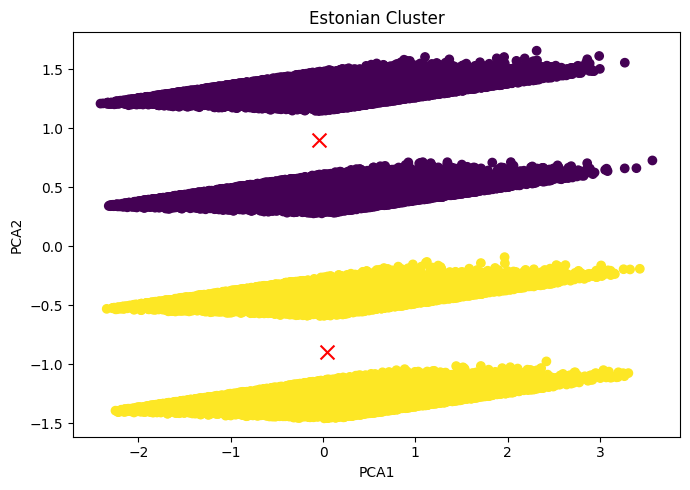

In [57]:

plt.figure(figsize=(7,5))

plt.scatter(reduced_2['PCA1'],reduced_2['PCA2'],c=model2.labels_)
plt.scatter(centers1[:,0],centers1[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Estonian Cluster')
plt.tight_layout()